# Testing several operations in images
We will deal images in Python code. It may help you overcome the very first step in operaring images. 

## general notice
It is always the case that you may try to find the written code on internet or AI, and use it without understanding.
It is OK, but at least check if the code is working as you expect.

If the code cause some Error, or the result is not as you expect, carefuly check the process. 
If you have some adviser, ask the help may be the easiest way in solving the problem.
Sometimes the behavior of some code or liblary is complicated, and finding the problem by yourself takes time and stressful.

## Import nesesary libraries
We will use the functions in external libraries, such as Numpy (for mathmatical calculation) and matplotlib (graph showing). You should declare it before use by "import".

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

## Read the image
Firstly go to the folder where the images are recorded. 
Here, I assume that the images are recorded in .bmp form in the folder "images" under the current folder.

In [2]:
current_directory = os.getcwd() # Getting the current directory, that means "which folder you are staying". 
print(current_directory) # Output the result by using "print" function

C:\Git\Start_programming


In [3]:
"""
We assume that the images are in the folder "images" in current directory.
Therefore, the we will add "images" to the current directory that we get in the previous cell.
"""
image_folder = os.path.join(current_directory, "images")
print(image_folder) # Print to make sure if the operation is success.

C:\Git\Start_programming\images


List up the images in the folder.

In [4]:
files = os.listdir(image_folder) # Read all the files in the folder
files = [f for f in files if f.endswith('.bmp')] # Get the files end with ".bmp"
# print files
for i, file in enumerate(files):
    print(f"{i}: {file}")

0: test_0.bmp
1: test_1.bmp


You may find two images "test_0.bmp" and "test_1.bmp". The name of images are kept in "files". Here try to show "test_0.bmp".

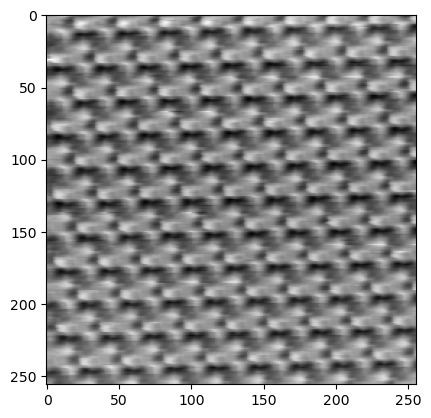

In [5]:
image_num = 0
image_name = files[image_num]  # The "test_0.bmp" is the 0th element in "file". 
image_color = plt.imread(image_folder +"\\" + image_name) # Reading the image
# make the image in gray scale
if len(image_color.shape) == 3:
    image_gray = np.mean(image_color, axis=2)  # Convert to grayscale by averaging RGB channels

# Show the image 
fig, ax = plt.subplots()
"""
Additional setting for graph showing
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
"""
ax.imshow(image_gray, cmap='gray')


Note: The image is not shown in my enviroment. I changed the kernel to Python[conda env:anaconda 3], then it shows. I don't know the reason.

Also try showing the other image (test_1.bmp).

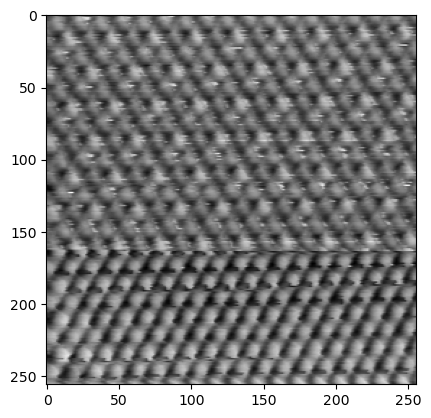

In [6]:
image_num = 1 # Change it from 0 to 1
image_name = files[image_num]  # The "test_1.bmp" is the 1st element in "file". 
image_color = plt.imread(image_folder +"\\" + image_name) # Reading the image
# make the image in gray scale
if len(image_color.shape) == 3:
    image_gray = np.mean(image_color, axis=2)  # Convert to grayscale by averaging RGB channels

# Show the image 
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap='gray')


We read two images by coying the same code twice. However, repeating the same code is annoying and hard to keep the consistency. Therefore, prepare it as the function. 

In [15]:
"""
Define the function to read the image.
def [name of the function] (parameters that wil be be used in this function)
"""
def read_image(num, file_list, folder_dir): # three parameters should be given when using it.
    image_name = file_list[num]
    image_color = plt.imread(folder_dir +"\\" + image_name)
    if len(image_color.shape) == 3:
        image_gray = np.mean(image_color, axis=2)  # Convert to grayscale by averaging RGB channels
    return image_color, image_gray # This function gives two values when it is used. 


In [16]:
"""
Function to show the image
"""
def show_image(image): # 
    fig, ax = plt.subplots()
    """
    # Additional setting for graph showing
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    """
    ax.imshow(image, cmap='gray')

Using the above functions, the two images can be read as follows:

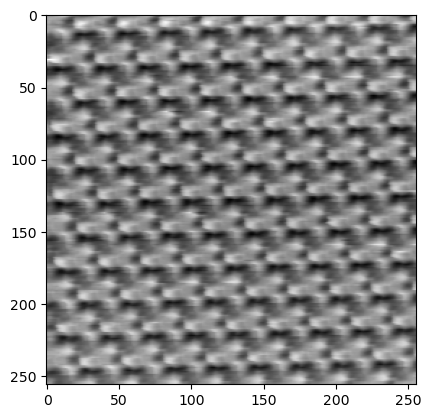

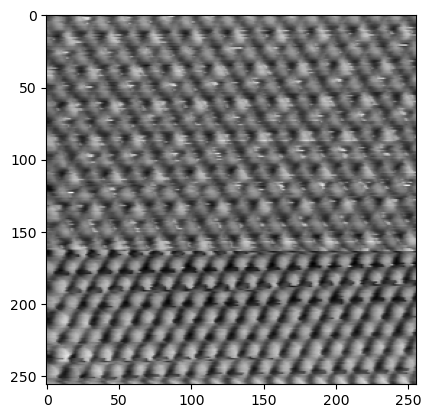

In [19]:
"""
When using "read_image", we should give three parameters: num, file_list, folder_dir.
Here we give "0", "files", and "image_folder". 
The name of the parameter is not nescesary to match. It is judged by the order.

Then, the function returns two values, image_color and image_gray.
These values are recieved as "image_0_color" and "image_0_gray".
"""
image_0_color, image_0_gray = read_image(0, files, image_folder)
image_1_color, image_1_gray = read_image(1, files, image_folder)
show_image(image_0_color)
show_image(image_1_color)

Here let us see the shape of the image for colored and gray-scale image:

In [24]:
print(image_0_gray.shape)
print(image_0_color.shape)

(256, 256)
(256, 256, 3)


The grayscale image may have two values, (256, 256). It indicates that the gray scale imagehas the 256×256 components. the colored image have additional 3 components, which is the RGB (red, green, blue) value to express the color.

Generally, gray scale is much easy to handle. Furthermore, the STM images should correspond to the gray scale, that is, one value at each pixcel. 
When using STM images, I recomend to convert the data to grayscale in the other software (such as Gwydion). 

## Image processing
Let us try several image processing. The first is smoothing.
In smoothing, the value in each pixel is replaced by the average of the values at the surronding pixcels.
For example, the value at (100, 100) is replaced by the average of the values in (99, 99), (99, 100), (99, 101), (100, 99), (100, 100), (100, 101), (101, 99), (101, 100), (101, 101).
You can get the average of much large area. 

Let is prepare the code for this smothing. 


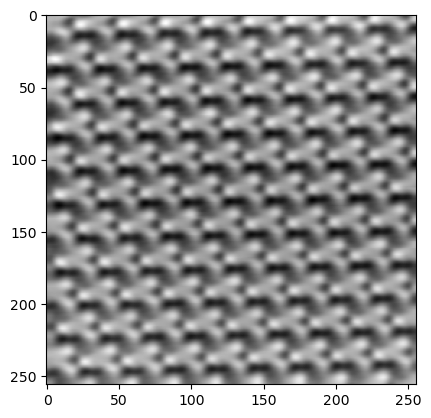

In [34]:
size = 2 # Size of the averaging area
result_image = np.zeros_like(image_0_gray) # Prepare other list to record the result
height, width  = image_0_gray.shape 
for i in range(0, height):
    for j in range(0, width):
        # For the pixcel at (i, j)
        values = [] # Prepare the list to temporal record of values.
        for k in range(-size, size + 1): 
            for l in range(-size, size + 1):
                # For the pixcels around (i, j). If size = 2, range(-2, 3) = -2, -1, 0, 1, 2. Note that 3 is not included. 
                if i+k <0 or i + k >= width or j +l <0 or j + l >= height:
                    # If the pixcel is out of the image, do not include.
                    pass
                else:
                    # Otherwise, record the value in values.
                    values.append(image_0_gray[i+k][j+l])
        # After the k and l loop, the values around (i, j) is recorded in values. Calculate the average.
        ave_val = sum(values)/len(values)
        # The averaged value are recorded in (i, j) of the result image.
        result_image[i][j] = ave_val

# Showing the image after the smoothing.
show_image(result_image)

Although the above code works, it is slow (especially when large size is used). This kind of general image operation is prepared in several liblaries. For example, the Gaussian smoothing can be done using Scipy. 

In [35]:
from scipy.ndimage import gaussian_filter

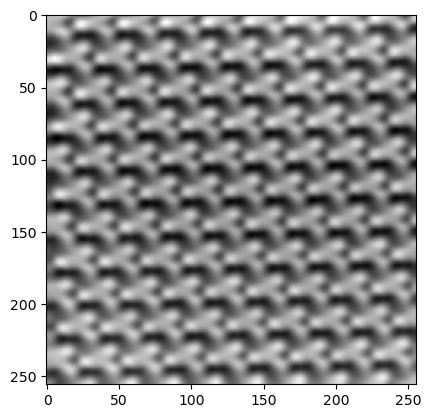

In [41]:
sigma = 2  # Standard deviation for Gaussian filter, similar to "size".
#
image_g_smooth = gaussian_filter(image_0_gray, sigma=sigma)
show_image(image_g_smooth)

Try detecting the maxima in the image with a simple code. If the values at (i, j) is larger than the values in the surronding pixcels, it is judge as maxima. Prepare it as the function:

In [55]:
def smoothing(image, sigma):
    image_s = gaussian_filter(image, sigma=sigma)
    return image_s

def maxima_detection(image, size, smooth_size):
    show_image(image) # Showing the original 
    image_smooth = smoothing(image, smooth_size) # Apply smoothing
    show_image(image_smooth) # Showing the image after smoothing
    
    height, width = image_smooth.shape 
    image_maxima = np.zeros_like(image_smooth)
    for i in range(0, height):
        for j in range(0, width):
            # To the value at (i, j)
            values = []
            for k in range(-size, size + 1):
                for l in range(-size, size + 1):
                    if i+k <0 or i + k >= width or j +l <0 or j + l >= height:
                        pass
                    else:
                        values.append(image_smooth[i+k][j+l])
            # All the valus at the surronding pixcels are in "values". 
            if image_smooth[i][j] == max(values):
                image_maxima[i][j] = 1 # Replace the value to 1 only when the value at (i, j) is the largest. 
    show_image(image_maxima) # Showing the mage after the detection
    return image_maxima

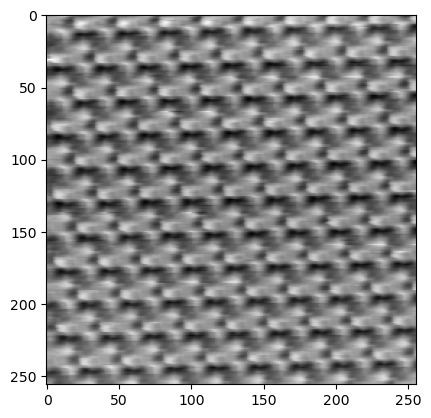

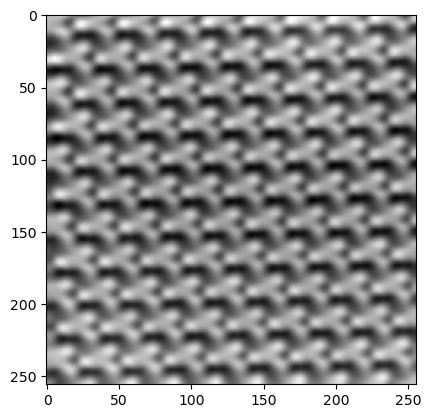

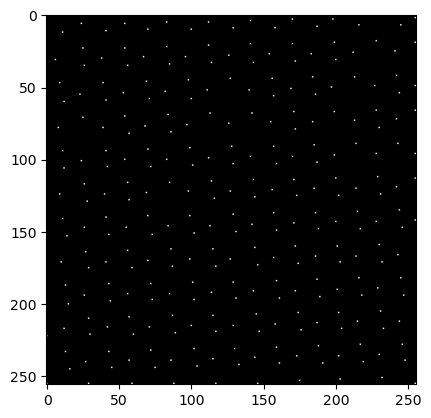

In [57]:
image_maxima = maxima_detection(image_0_gray, 7, 2)

Try to show the detected maxima on the original image. We will use the colored image for a good visibility. 

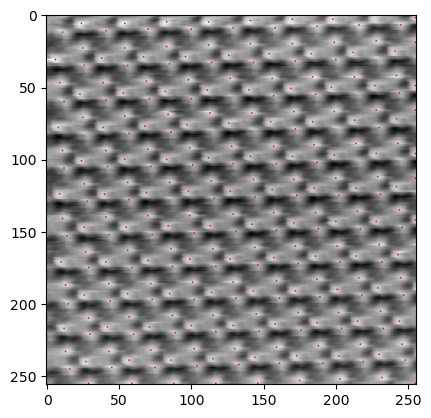

In [60]:
image_color = np.copy(image_0_color)
height, width, channel = image_0_color.shape
for i in range(0, height):
    for j in range(0, width):
        if image_maxima[i][j] == 1:
            # If (i, j) is maxima, keep only the R component. Note that the maximam color value here is 255.
            image_color[i][j][0] = 255
            image_color[i][j][1] = 0
            image_color[i][j][2] = 0
show_image(image_color)

## Other operations
Just playing with the image

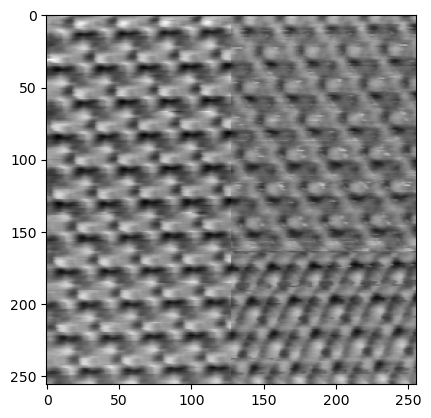

In [67]:
# Combine two images
image_combine = image_0_gray + image_1_gray
show_image(image_combine)

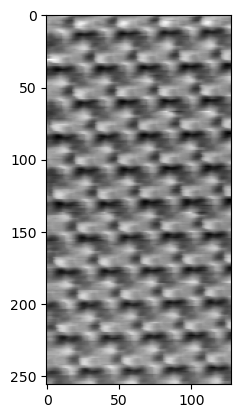

In [68]:
# Cut the image to half
image_cut = image_0_gray[:, 0:128]
show_image(image_cut)

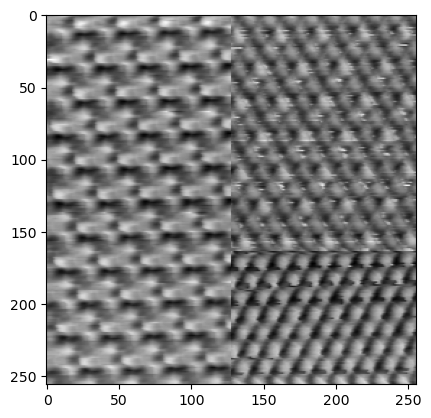

In [70]:
# Replace the half f the image
image_mearge = np.copy(image_1_gray)
image_mearge[:, 0:128] = image_cut
show_image(image_1_gray)